# Exploratory Data Analysis - Global Salaries in AI Market

## Importing Data & Quick Look What We're Working With

In [13]:
import zipfile

FILE_PATH = '../data/global-ai-job-market-and-salary-trends-2025.zip'
EXTRACT_PATH = '../data/'

with zipfile.ZipFile(FILE_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)


In [17]:
import pandas as pd

DATA_PATH = '../data/ai_job_dataset.csv'

df = pd.read_csv(DATA_PATH)
df.head(3)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech


### Basic Data Checks

In [35]:
def quick_info(dataset: pd.DataFrame) -> None:
    print("##############################################")
    print(f'Shape of the dataset: {dataset.shape}')
    print("##############################################")
    print(f'Dataset info(): {dataset.info()}')
    print("##############################################")
    print(f'Dataset describe(): {dataset.describe()}')

quick_info(df)

##############################################
Shape of the dataset: (15000, 19)
##############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience

### Missin' Values Check 

In [39]:
print(df.isnull().sum())

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


### Checking Numerical & Categorical Columns

In [43]:
print(df.dtypes)

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object


In [49]:
categorical_cols = df.select_dtypes(['object']).columns
numerical_cols = df.select_dtypes(include='number').columns

print("CATEGORICAL COLUMNS:")
print(categorical_cols)
print("NUMERICAL COLUMNS:")
print(numerical_cols)

CATEGORICAL COLUMNS:
Index(['job_id', 'job_title', 'salary_currency', 'experience_level',
       'employment_type', 'company_location', 'company_size',
       'employee_residence', 'required_skills', 'education_required',
       'industry', 'posting_date', 'application_deadline', 'company_name'],
      dtype='object')
NUMERICAL COLUMNS:
Index(['salary_usd', 'remote_ratio', 'years_experience',
       'job_description_length', 'benefits_score'],
      dtype='object')


### Checking How Many Unique Values in Each Column

In [50]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

job_id: 15000 unique values
job_title: 20 unique values
salary_usd: 14315 unique values
salary_currency: 3 unique values
experience_level: 4 unique values
employment_type: 4 unique values
company_location: 20 unique values
company_size: 3 unique values
employee_residence: 20 unique values
remote_ratio: 3 unique values
required_skills: 13663 unique values
education_required: 4 unique values
years_experience: 20 unique values
industry: 15 unique values
posting_date: 486 unique values
application_deadline: 543 unique values
job_description_length: 2000 unique values
benefits_score: 51 unique values
company_name: 16 unique values


In [57]:
print("JOB TITLES")
df['job_title'].unique()

JOB TITLES


array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

## Visualizing Our Dataset 😎

Some ideas:

    1). job title frequency
    2). median salary by job title

### Job Title Frequency

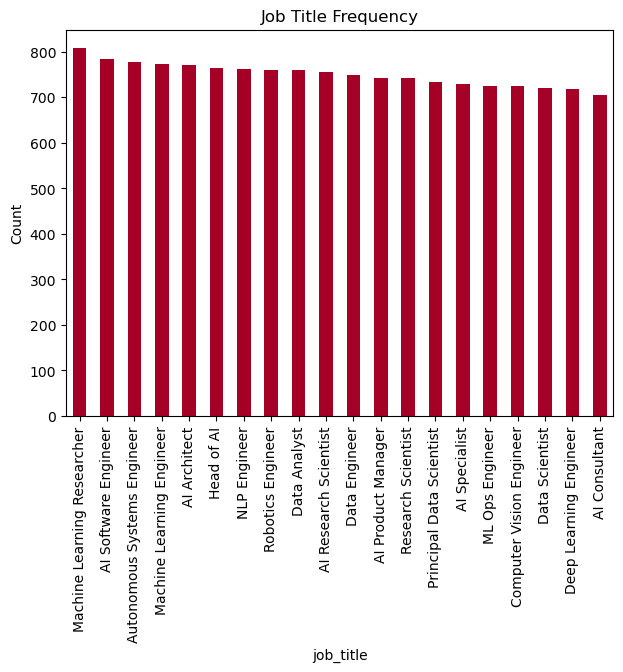

In [96]:
import matplotlib.pyplot as plt

job_titles = list(df['job_title'].unique())
job_counts = df['job_title'].value_counts()

plt.title('Job Title Frequency')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
job_counts.plot(kind='bar', colormap='RdYlGn')
plt.show()


C:\Users\pawel\AppData\Local\Temp\ipykernel_27200\3531455523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_counts, palette='viridis');


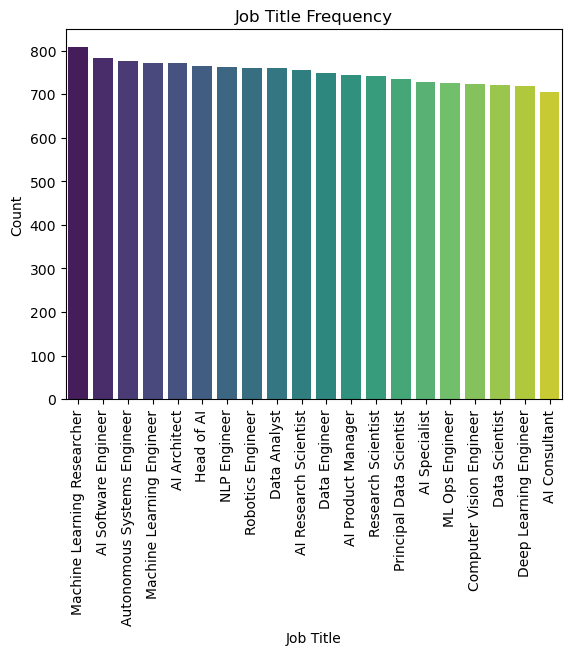

In [87]:
# same thing using Seaborn
import seaborn as sns

plt.title('Job Title Frequency')
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=90)
sns.barplot(data=job_counts, palette='viridis');


### Median Salary by Job Title

In [ ]:
median_salaries = df.groupby('job_title')['salary_usd'].median().reset_index()
median_salaries = median_salaries.sort_values(by='salary_usd', ascending=False)

plt.figure(figsize=(10, 6))

plt.title('Median Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=90)
sns.barplot(data=median_salaries, x='job_title', y='salary_usd', palette='viridis');

NameError: name 'df' is not defined